# Dashboards

In [1]:
from pathlib import Path
import geopandas as gpd
import pandas as pd
import os
import matplotlib.pyplot as plt
import pygeos as pyg
import sys
from shapely import wkt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba_array
from matplotlib.lines import Line2D

sys.path.append("../scripts")
from utils import *
from Europe_utils import *

config = load_config(file='config-KeesWork.json')
config

{'comment': 'This json file contains the paths to the directories where the in- and output files are located',
 'paths': {'data': WindowsPath('D:/Python/europe_flood_road_disruption/data'),
  'output_data': WindowsPath('D:/Python/europe_flood_road_disruption/data/output'),
  'output_images': WindowsPath('D:/Python/europe_flood_road_disruption/visualisations'),
  'NUTS_shapes': WindowsPath('D:/Europe_trade_disruptions/NUTS-2_shapes/NUTS_2016'),
  'graphs_folder': WindowsPath('D:/Europe_percolation/frederiques_networks'),
  'preproc_output': WindowsPath('D:/Europe_percolation/combined_results/combined_preproc_output'),
  'main_output': WindowsPath('D:/Europe_percolation/combined_results/combined_main_output')}}

In [2]:
from visualisations_new import aggregate_results_step1, aggregate_results_step2, percolation_summary

In [3]:
from visualisations_new import main
df,df_abs,df_rel = main(config)

perc_overview = percolation_summary(df)
perc_overview
#perc_overview.to_csv('Completeness_14-5-2021.csv',sep=';')

 -------- main() starting --------
Succesfully loaded source file as dataframe, with columns:
Index(['AoI combinations', 'disrupted', 'avg extra time', 'AoI removed',
       'no detour', 'country'],
      dtype='object')
Available for 28 countries
Grouping per AoI-country combination
 -------- main() finished --------


,AoIs,Reps_unique,Mode_reps,Frequency_mode_reps
Albania,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50...","[176, 200, 1]",200,14
Austria,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50...","[200, 1]",200,18
Belgium,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50...","[183, 500, 1]",500,14
Bulgaria,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50...","[200, 1]",200,19
Croatia,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50...","[200, 1]",200,17
Czechia,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50...","[200, 1]",200,18
Denmark,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50...","[67, 500, 1]",500,13
Estonia,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50...","[139, 200, 1]",200,14
Finland,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50...","[200, 1]",200,29
France,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50...","[172, 176, 161, 171, 173, 164, 167, 163, 169, ...",172,5


### Load required input data

In [4]:
def NUTS_up(N3):
    """Return the corresponding NUTS-2 code for a NUTS-3 code. 
    """
    return N3[:-1]

#LOAD NUTS DATA
N3_path = config['paths']['NUTS_shapes'] / 'NUTS_RG_01M_2016_3035_LEVL_3.shp'
N3 = gpd.read_file(N3_path)
N3 = N3.loc[~N3["NUTS_ID"].isin(NUTS_3_remote())] #Remote overseas territories
N3 = N3.loc[~(N3["CNTR_CODE"] == "TR")] #Remove Turkey
#N3 = N3.to_crs("epsg:4326")

N2_path = config['paths']['NUTS_shapes'] / 'NUTS_RG_01M_2016_3035_LEVL_2.shp'
N2 = gpd.read_file(N2_path)
N2 = N2.loc[~(N2["CNTR_CODE"] == "TR")] #Remove Turkey
NUTS_2_remote = list(set([NUTS_up(N3) for N3 in NUTS_3_remote()]))
N2 = N2.loc[~N2['NUTS_ID'].isin(NUTS_2_remote)]
#N2.plot()

graphs_folder = config['paths']['graphs_folder']

stats_path = config['paths']['data'] / ('descriptive_stats.csv')
stats = pd.read_csv(stats_path,delimiter=';',index_col=0)
stats.head(n=2)

,Edge_No,Node_No,Density,Clique_No,Ave_Path_Length,Assortativity,Diameter,Edge_Connectivity,Max_Degree,Total_Edge_Length,Len_Motorway,Len_Primary,Len_Secondary,Len_Tertiary,Len_Trunk
BE,65778.0,42729.0,0.000072,3.0,74.516557,0.079687,202.0,1.0,10.0,3.474952e+07,4.660953e+06,5.673878e+06,8.168529e+06,1.434923e+07,1.896923e+06
IE,31168.0,20325.0,0.000151,4.0,67.395056,0.012874,207.0,1.0,12.0,3.930866e+07,2.322177e+06,2.750245e+06,1.356214e+07,1.853443e+07,2.139660e+06


In [5]:
#Load centroids of NUTS-2 and NUTS-3 regions (made in the preprocessing scripts)
centroids_n2 = config['paths']['data'] / 'europe_nuts2_centroids.feather'
centroids_n3 = config['paths']['data'] / 'europe_nuts3_centroids.feather'
assert (centroids_n2.exists() and centroids_n3.exists())

#Process and filter NUTS-3 regions
centroids_n3 =pd.read_feather(centroids_n3)
centroids_n3['geometry'] = centroids_n3['geometry'].apply(wkt.loads)
centroids_n3 = gpd.GeoDataFrame(centroids_n3)
centroids_n3.crs = 'epsg:4326'
centroids_n3 = centroids_n3.to_crs('epsg:3035')
centroids_n3 = centroids_n3.loc[~centroids_n3["NUTS_ID"].isin(NUTS_3_remote())]
centroids_n3 = centroids_n3.loc[~(centroids_n3["CNTR_CODE"] == "TR")]
#centroids_n3.plot()

#Process and filter NUTS-2 regions
centroids_n2 =pd.read_feather(centroids_n2)
centroids_n2['geometry'] = centroids_n2['geometry'].apply(wkt.loads)
centroids_n2 = gpd.GeoDataFrame(centroids_n2)
centroids_n2.crs = 'epsg:4326'
centroids_n2 = centroids_n2.to_crs('epsg:3035')
centroids_n2 = centroids_n2.loc[~centroids_n2["NUTS_ID"].isin(NUTS_2_remote)]
centroids_n2 = centroids_n2.loc[~(centroids_n2["CNTR_CODE"] == "TR")]
#centroids_n2.plot()    

### Load and process raw percolation results

In [6]:
import visualisations_new as vis
#LOAD RESULTS OF THE PERCOLATION: DISRUPTED ROUTES
df,df_abs,df_rel = vis.main(config)
df.head(n=2)

#LOAD AND PROCESS NO DETOUR RESULTS
no_dt_abs, no_dt_rel = vis.process_no_detour(df)

#LOAD AND PROCESS EXTRA TIME VISUALISATIONS
extra_time_abs,extra_time_rel = vis.process_extra_time(df)

#LOAD AND PROCESS TOTAL EXTRA TRAVEL TIME RESULTS
#THIS IS DONE PER INDIVIDUAL COUNTRY TO SPEED-UP THE SCRIPT

 -------- main() starting --------
Succesfully loaded source file as dataframe, with columns:
Index(['AoI combinations', 'disrupted', 'avg extra time', 'AoI removed',
       'no detour', 'country'],
      dtype='object')
Available for 28 countries
Grouping per AoI-country combination
 -------- main() finished --------
 -------- Process_no_detour() finished --------
 -------- Process_extra_time() finished --------


In [7]:
all_countries = df['country'].unique()

### Make a selection of the countries for which the current config applies
Some paths may be different (e.g. references to the graph) dependent on which machine it was run.

In [8]:
cs = ['DK','EE','LV','LT','MK','SI','SE'] #run by Kees (rest by Frederique, different config settings)
ignore_countries = [country_names(c) for c in cs]
ignore_countries
todo_countries = [c for c in all_countries if c not in ignore_countries]
todo_countries = [country_code_from_name(c) for c in todo_countries]
todo_countries

['AL',
 'AT',
 'BE',
 'BG',
 'HR',
 'CZ',
 'FI',
 'FR',
 'DE',
 'EL',
 'HU',
 'IE',
 'NL',
 'NO',
 'PL',
 'PT',
 'RO',
 'RS',
 'SK',
 'ES',
 'CH']

### Load the group lists
These groups are made base on some shared characteristics in the visualisations_new.py

In [9]:
#Load groups (for bottom row plots)
import pickle
groups_file = config['paths']['data'] / 'groups' / 'group_4_by_nr_AoI.p'
with open(groups_file,'rb') as f:
    groups = pickle.load(f)
print(groups)

[('France', 'Spain', 'Germany', 'Sweden'), ('Poland', 'Finland', 'Romania', 'Norway'), ('Hungary', 'Bulgaria', 'Serbia', 'Austria'), ('Greece', 'Czechia', 'Portugal', 'Croatia'), ('Slovakia', 'Lithuania', 'Latvia', 'Switzerland'), ('Ireland', 'Belgium', 'Albania', 'Netherlands'), ('Macedonia', 'Estonia', 'Slovenia', 'Denmark')]


In [10]:
### Load some very specific utils for this script, to reduce the lenght of this ipynb
from dashboard_utils import *

In [11]:
config = load_config(file='config-KeesWork.json')
config

{'comment': 'This json file contains the paths to the directories where the in- and output files are located',
 'paths': {'data': WindowsPath('D:/Python/europe_flood_road_disruption/data'),
  'output_data': WindowsPath('D:/Python/europe_flood_road_disruption/data/output'),
  'output_images': WindowsPath('D:/Python/europe_flood_road_disruption/visualisations'),
  'NUTS_shapes': WindowsPath('D:/Europe_trade_disruptions/NUTS-2_shapes/NUTS_2016'),
  'graphs_folder': WindowsPath('D:/Europe_percolation/frederiques_networks'),
  'preproc_output': WindowsPath('D:/Europe_percolation/combined_results/combined_preproc_output'),
  'main_output': WindowsPath('D:/Europe_percolation/combined_results/combined_main_output')}}

### Color settings for plot

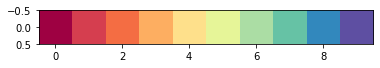

In [12]:
colors = ['#9e0142','#d53e4f','#f46d43','#fdae61','#fee08b','#e6f598','#abdda4','#66c2a5','#3288bd','#5e4fa2']
roads_cc = colors[0:5][::-1] #We iterate over the roads in reversed order
roads_lw_cc = [1,0.7,0.5,.3,.3][::-1] #linewidth cycler
nuts_fill = '#abdda4'
nuts_border = '#66c2a5'

length_cols = ['Total_Edge_Length', 'Len_Motorway', 'Len_Trunk', 'Len_Primary', 'Len_Secondary', 'Len_Tertiary']

road_types = ['motorway','trunk','primary','secondary','tertiary']

plt.imshow(to_rgba_array(colors).reshape(1,len(colors),4))
plt.show()

### Creating one dashboard

In [13]:
n2_analysis = ['BE','NL','DE'] #List of countries for which analysis is done on NUTS-2 level instead of NUTS-3 level

Starting total extra travel time calculation, calc_total_extra_time()


../scripts\visualisations_new.py:902: UserWarning: The number of actual routes 45 deviates from the expected value 20 for DK
  warn('The number of actual routes {} deviates from the expected value {} for {}'.format(theoretical_routes,


Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Greece EL 741
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Czechia CZ 91
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Portugal PT 253
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Croatia HR 190
calc_total_extra_time() finished!
 -------- Process_total_extra_time() finished --------
dashboard for HR finished
dashboard for HR saved


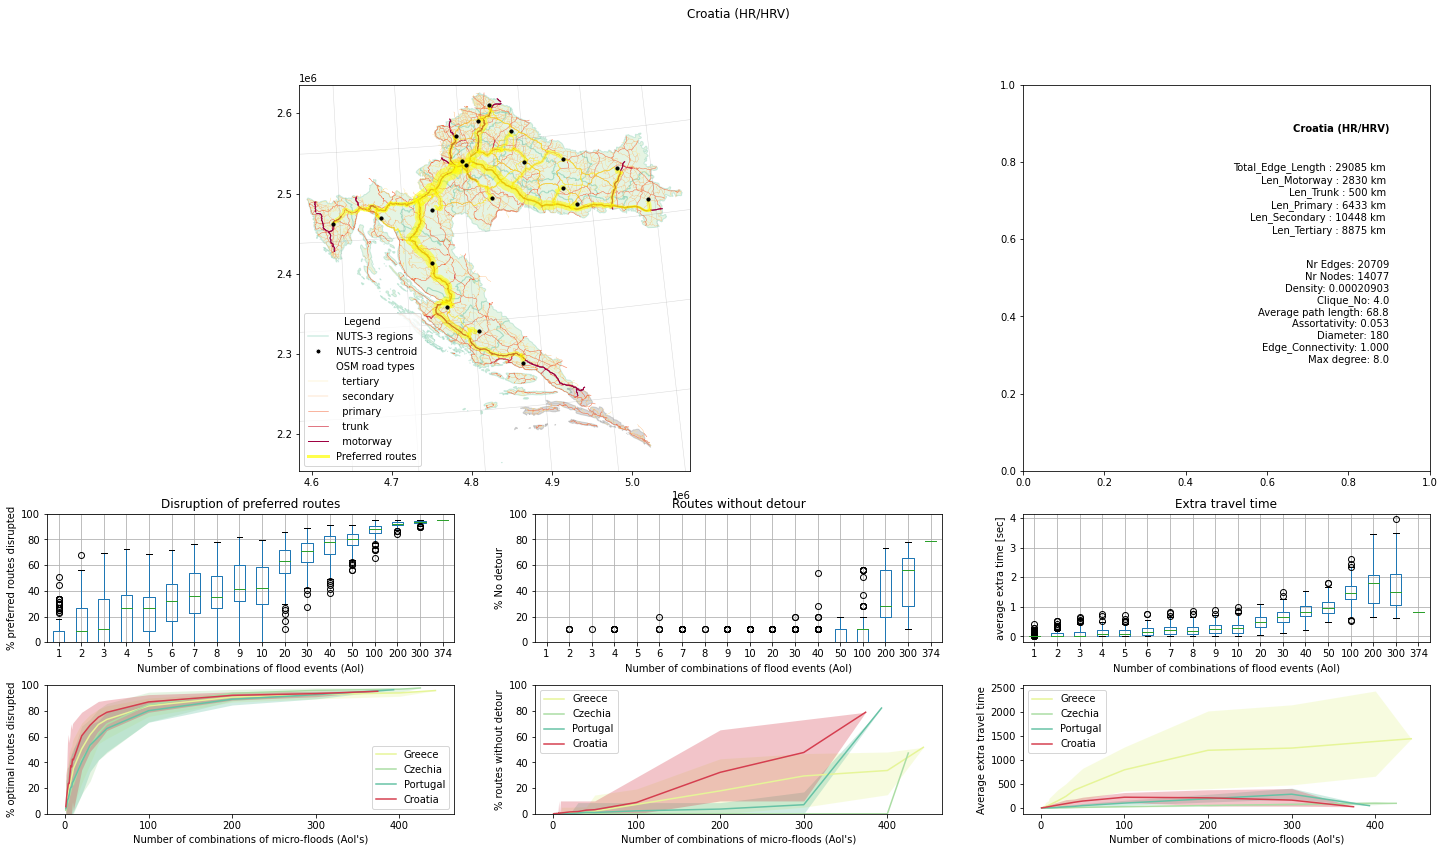

In [16]:
c = 'HR'
save_pdf=False,
save_png=False
fb=('q_05','q_95')

#def create_dashboard(c,save_pdf=False,save_png=False,fb=('q_05','q_95')):
if True:
    """
    Create dashboard for a country
    
    Arguments:
        *c* (string) : NUTS0-code of country, e.g. 'AT'
        *save_pdf* (Boolean) : indicate if fig should be saved in dashboards/... as pdf file
        *save_png* (Boolean) : indicate if fig should be saved in dashboards/... as png file
        *fb* (tuple) : fill_between setting for the aggregated lineplots, e.g. ('q_05','q_95')
    
    """
    fig = plt.figure(figsize=(1.5*16,1.5*9))


    nrows=3
    ncols=3
    hr = [3,1,1]

    grid = plt.GridSpec(nrows=nrows,ncols=ncols, wspace = .2, hspace = .2, figure=fig, height_ratios=hr)

    ax00 = fig.add_subplot(grid[0, 0:2])
    ax03 = fig.add_subplot(grid[0, 2])
    ax10 = fig.add_subplot(grid[1, 0])
    ax11 = fig.add_subplot(grid[1, 1])
    ax12 = fig.add_subplot(grid[1, 2])
    ax20 = fig.add_subplot(grid[2, 0])
    ax21 = fig.add_subplot(grid[2, 1])
    ax22 = fig.add_subplot(grid[2, 2])
    
    #### Prepare empty legend handles ####
    handles00 = []
    

    
    ######################################## TOP PANEL (MAP top left) ###############################################
    nutslevel = 'n3' #n3 or n2
    fb=('q_05','q_95')
    if c in n2_analysis: nutslevel = 'n2'
    
    if nutslevel == 'n3':
        #PLOT AREA
        N3_sel = N3.loc[(N3["CNTR_CODE"] == c)]
        N3_sel_active = N3_sel[~N3_sel['NUTS_ID'].isin(NUTS_3_islands())]
        N3_sel_active.plot(ax=ax00,facecolor=nuts_fill,alpha=0.3,edgecolor=nuts_border)
        N3_sel_inactive = N3_sel[N3_sel['NUTS_ID'].isin(NUTS_3_islands())]
        N3_sel_inactive.plot(ax=ax00,facecolor='grey',alpha=0.3,edgecolor='grey')
        
        #Plot centroids
        centroids_n3_sel = centroids_n3[~centroids_n3['NUTS_ID'].isin(NUTS_3_islands())]
        centroids_n3_sel.loc[centroids_n3_sel['CNTR_CODE'] == c].plot(ax=ax00,color='black',markersize=10,zorder=5)
        
        handles00.append(Line2D([0], [0], color=nuts_border, label='NUTS-3 regions',linestyle='-',alpha=0.3))   
        handles00.append(Line2D([0], [0], marker='o', color='w', label='NUTS-3 centroid', markerfacecolor='black', markersize=5))
        
    elif nutslevel == 'n2':
        #PLOT AREA
        N2_sel = N2.loc[(N2["CNTR_CODE"] == c)]
        NUTS_2_islands = list(set([NUTS_up(N3) for N3 in NUTS_3_islands()]))
        N2_sel_active = N2_sel[~N2_sel['NUTS_ID'].isin(NUTS_2_islands)]
        N2_sel_active.plot(ax=ax00,facecolor=nuts_fill,alpha=0.3,edgecolor=nuts_border)
        N2_sel_inactive = N2_sel[N2_sel['NUTS_ID'].isin(NUTS_2_islands)]
        N2_sel_inactive.plot(ax=ax00,facecolor='grey',alpha=0.3,edgecolor='grey')
        
        #Plot centroids
        #Todo: gives an error
        centroids_n2_sel = centroids_n2[~centroids_n2['NUTS_ID'].isin(NUTS_2_islands)]
        centroids_n2_sel.loc[centroids_n2_sel['CNTR_CODE'] == c].plot(ax=ax00,color='black',markersize=10,zorder=5)
        
        handles00.append(Line2D([0], [0], color=nuts_border, label='NUTS-2 regions',linestyle='-',alpha=0.3))
        handles00.append(Line2D([0], [0], marker='o', color='w', label='NUTS-2 centroid', markerfacecolor='black', markersize=5))
    
    if True:
        #PLOT NETWORK
        L3 = N0_to_3L(c)
        edges_file = graphs_folder / '{}-edges.feather'.format(L3)
        #assert c,edges_file.exists()
        network = pd.read_feather(edges_file)
        network['geoms'] = pyg.io.to_wkt(
            pyg.from_wkb(network.geometry))  # see if this should be activated with the new feather files
        network['geoms'] = network['geoms'].apply(wkt.loads)
        network.drop('geometry', axis=1, inplace=True)
        network.rename(columns={'geoms': 'geometry'}, inplace=True)
        network['highway_mapped'] = network['highway'].map(highway_mapper())
        
        if True:
            
            handles00.append(Line2D([0], [0], label='OSM road types',alpha=0))
            for r,road_type in enumerate(road_types[::-1]):
                ns = network.loc[network['highway_mapped'] == road_type]
                ns = gpd.GeoDataFrame(ns)
                ns.plot(color=roads_cc[r],ax=ax00,linewidth=roads_lw_cc[r])
                handles00.append(Line2D([0], [0], color=roads_cc[r], label='  ' + road_type,linestyle='-',linewidth=roads_lw_cc[r]))
    
    #ADD SHADING ON TOP OF THE ROUTES THAT ARE USED IN PREFERRED ROUTES BETWEEN OD-PAIRS
    #Todo: move to more appropriate location
    #optimal_routes = config['paths']['preproc_output']  / 'optimal_routes_time_{}.feather'.format(country_names(c).lower())
    country_name = country_names(c).lower() 
    optimal_routes = config['paths']['preproc_output']  / '{}/optimal_routes_time_{}.feather'.format(country_name,country_name)
    #assert optimal_routes.exists()
    optimal_routes =pd.read_feather(optimal_routes)
    
    counter, to_plot = edge_count_optimal_routes(optimal_routes)
    for key in to_plot.keys():
        #key = 10 #plot edges used by n routes
        if max(to_plot.keys()) > 100: #smaller lines in case of many routes
            lw = 0.5 + 0.05 *key
        else: 
            lw = 0.5 + 0.2 *key
        sn = network.loc[network['id'].isin(to_plot[key])]
        sn = gpd.GeoDataFrame(sn)
        sn.plot(ax=ax00,color='yellow',linewidth=lw,alpha=0.5)
    handles00.append(Line2D([0], [0], color='yellow', label='Preferred routes',linestyle='-', lw=3,alpha=.7))   
        
    ######################################## DATA PANEL top right ###############################################
    #GET THE INFO FOR THE TEXT PANEL
    c_stats = stats.loc[stats.index==c]
    c_stats

    #WRITE SOME TEXT 
    header = '{} ({}/{})'.format(country_names(c),c,N0_to_3L(c))
    ax03.text(x=0.9,y=0.9,s=header,fontweight='bold',transform=ax03.transAxes,ha='right',va='top')

    text1 = prepare_stats(c_stats,length_cols) #Prepare the stats information string in the right format

    ax03.text(x=0.9,y=0.8,s=text1,transform=ax03.transAxes,ha='right',va='top')

    ##### WRITE THE RESULTS OF THE PERCOLATION ANALYSIS ####
    #WRITE PERCOLATION RESULTS
    c_name = country_names(c)

    #Find group that c is in
    group_sel = None
    for group in groups:
        if c_name in group:
            group_sel = group
    
    #Set colors for aggregated lineplots
    index_in_list = group_sel.index(c_name)
    plot_colors = colors[5:9]
    plot_colors[index_in_list] = colors[1] #Make country of this dashboard red
    
    #TODO: ADD THE OTHER COUNTRIES IN THE SAME GROUP, BUT SHADED GREY
    fig, ax10 = vis.boxplot_one_country(df,c_name,fig=fig,ax=ax10)
    fig, ax20 = vis.aggregated_lineplot_new(df_abs,group_sel,fig=fig,ax=ax20,fill_between=fb,clrs=plot_colors)
    ax10.set_title('Disruption of preferred routes')

    
    fig, ax11 = vis.no_detour_boxplot(df,c_name,save=False,fig=fig,ax=ax11)
    fig, ax21 = vis.no_detour_aggregated_lineplot(no_dt_abs,group_sel,fig=fig,ax=ax21,fill_between=fb,clrs=plot_colors)
    ax11.set_title('Routes without detour')

    #Old version of the extra time boxplots
    #fig, ax12 = vis.extra_time_boxplot(df,c_name,unit='sec',save=False,fig=fig, ax=ax12)
    #fig, ax22 = vis.extra_time_aggregated_lineplot(extra_time_abs, group_sel, fill_between=fb, fig=fig,ax=ax22,clrs=plot_colors)
    
    #New verison of the extra time boxplots
    df_totaltraveltime = vis.calc_total_extra_time(df,countries=group_sel,N2=n2_analysis)
    total_extra_time_abs, total_extra_time_rel = vis.process_total_extra_time(df_totaltraveltime)
    
    fig, ax12 = vis.extra_time_boxplot(df,c_name,unit='sec',save=False,fig=fig, ax=ax12)
    fig, ax22 = vis.total_extra_time_aggregated_lineplot(total_extra_time_abs, group_sel, fill_between=fb, fig=fig,ax=ax22,clrs=plot_colors)
    ax12.set_title('Extra travel time')

    
    for ax in [ax10,ax20,ax11,ax21]:
        ax.set_ylim(0,100)
        
    fig.suptitle(t='{} ({}/{})'.format(country_names(c),c,N0_to_3L(c))) #Supress text
    
    
    #### Add legend
    ax00.legend(handles=handles00,title='Legend',loc='best')

    ### Add gridlines
    if nutslevel == 'n3':
        ax00 = add_grid(ax00,N3_sel)
    
    elif nutslevel == 'n2':
        ax00 = add_grid(ax00,N2_sel)
    
    print('dashboard for {} finished'.format(c))
    #if save_pdf: fig.savefig('dashboards3/{}.pdf'.format(c),bbox_inches='tight',dpi=500)
    #if save_png: fig.savefig('dashboards3/{}.png'.format(c),bbox_inches='tight',dpi=500)
    if save_pdf or save_png: print('dashboard for {} saved'.format(c))
        
    
#create_dashboard('BE',save_pdf=False,save_png=True,fb=('q_05','q_95'))

In [17]:
fig.savefig('dashboards3/{}.png'.format(c),bbox_inches='tight',dpi=500)

In [35]:
for c in todo_countries:
    print(c)
    try:
        create_dashboard(c,save_pdf=False,save_png=True)
        plt.close('all')
    except Exception as e:
        print(e)

AL


C:\Users\Ginkel\AppData\Local\Continuum\anaconda3\envs\europe_flood_road_disruption\lib\site-packages\geopandas\plotting.py:604: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


Starting total extra travel time calculation, calc_total_extra_time()


../scripts\visualisations_new.py:902: UserWarning: The number of actual routes 45 deviates from the expected value 20 for DK
  warn('The number of actual routes {} deviates from the expected value {} for {}'.format(theoretical_routes,


Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Ireland IE 28
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Belgium BE 55.0
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Albania AL 66
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Netherlands NL 66.0
calc_total_extra_time() finished!
 -------- Process_total_extra_time() finished --------
dashboard for AL finished
dashboard for AL saved
AT


C:\Users\Ginkel\AppData\Local\Continuum\anaconda3\envs\europe_flood_road_disruption\lib\site-packages\geopandas\plotting.py:604: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


Starting total extra travel time calculation, calc_total_extra_time()


../scripts\visualisations_new.py:902: UserWarning: The number of actual routes 45 deviates from the expected value 20 for DK
  warn('The number of actual routes {} deviates from the expected value {} for {}'.format(theoretical_routes,


Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Hungary HU 190
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Bulgaria BG 378
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Serbia RS 300
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Austria AT 595
calc_total_extra_time() finished!
 -------- Process_total_extra_time() finished --------
dashboard for AT finished
dashboard for AT saved
BE


C:\Users\Ginkel\AppData\Local\Continuum\anaconda3\envs\europe_flood_road_disruption\lib\site-packages\geopandas\plotting.py:604: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


Starting total extra travel time calculation, calc_total_extra_time()


../scripts\visualisations_new.py:902: UserWarning: The number of actual routes 45 deviates from the expected value 20 for DK
  warn('The number of actual routes {} deviates from the expected value {} for {}'.format(theoretical_routes,


Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Ireland IE 28
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Belgium BE 55.0
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Albania AL 66
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Netherlands NL 66.0
calc_total_extra_time() finished!
 -------- Process_total_extra_time() finished --------
dashboard for BE finished
dashboard for BE saved
BG


C:\Users\Ginkel\AppData\Local\Continuum\anaconda3\envs\europe_flood_road_disruption\lib\site-packages\geopandas\plotting.py:604: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


Starting total extra travel time calculation, calc_total_extra_time()


../scripts\visualisations_new.py:902: UserWarning: The number of actual routes 45 deviates from the expected value 20 for DK
  warn('The number of actual routes {} deviates from the expected value {} for {}'.format(theoretical_routes,


Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Hungary HU 190
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Bulgaria BG 378
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Serbia RS 300
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Austria AT 595
calc_total_extra_time() finished!
 -------- Process_total_extra_time() finished --------
dashboard for BG finished
dashboard for BG saved
HR


C:\Users\Ginkel\AppData\Local\Continuum\anaconda3\envs\europe_flood_road_disruption\lib\site-packages\geopandas\plotting.py:604: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


Starting total extra travel time calculation, calc_total_extra_time()


../scripts\visualisations_new.py:902: UserWarning: The number of actual routes 45 deviates from the expected value 20 for DK
  warn('The number of actual routes {} deviates from the expected value {} for {}'.format(theoretical_routes,


Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Greece EL 741
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Czechia CZ 91
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Portugal PT 253
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Croatia HR 190
calc_total_extra_time() finished!
 -------- Process_total_extra_time() finished --------
dashboard for HR finished
dashboard for HR saved
CZ


C:\Users\Ginkel\AppData\Local\Continuum\anaconda3\envs\europe_flood_road_disruption\lib\site-packages\geopandas\plotting.py:604: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


Starting total extra travel time calculation, calc_total_extra_time()


../scripts\visualisations_new.py:902: UserWarning: The number of actual routes 45 deviates from the expected value 20 for DK
  warn('The number of actual routes {} deviates from the expected value {} for {}'.format(theoretical_routes,


Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Greece EL 741
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Czechia CZ 91
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Portugal PT 253
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Croatia HR 190
calc_total_extra_time() finished!
 -------- Process_total_extra_time() finished --------
dashboard for CZ finished
dashboard for CZ saved
FI


C:\Users\Ginkel\AppData\Local\Continuum\anaconda3\envs\europe_flood_road_disruption\lib\site-packages\geopandas\plotting.py:604: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


Starting total extra travel time calculation, calc_total_extra_time()


../scripts\visualisations_new.py:902: UserWarning: The number of actual routes 45 deviates from the expected value 20 for DK
  warn('The number of actual routes {} deviates from the expected value {} for {}'.format(theoretical_routes,


Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Poland PL 2628
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Finland FI 153
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Romania RO 861
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Norway NO 105
calc_total_extra_time() finished!
 -------- Process_total_extra_time() finished --------
dashboard for FI finished
dashboard for FI saved
FR
Starting total extra travel time calculation, calc_total_extra_time()


../scripts\visualisations_new.py:902: UserWarning: The number of actual routes 45 deviates from the expected value 20 for DK
  warn('The number of actual routes {} deviates from the expected value {} for {}'.format(theoretical_routes,


Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
France FR 4371
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Spain ES 1081
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Germany DE 703.0
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Sweden SE 190
calc_total_extra_time() finished!
 -------- Process_total_extra_time() finished --------
dashboard for FR finished
dashboard for FR saved
DE


C:\Users\Ginkel\AppData\Local\Continuum\anaconda3\envs\europe_flood_road_disruption\lib\site-packages\geopandas\plotting.py:604: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


Starting total extra travel time calculation, calc_total_extra_time()


../scripts\visualisations_new.py:902: UserWarning: The number of actual routes 45 deviates from the expected value 20 for DK
  warn('The number of actual routes {} deviates from the expected value {} for {}'.format(theoretical_routes,


Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
France FR 4371
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Spain ES 1081
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Germany DE 703.0
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Sweden SE 190
calc_total_extra_time() finished!
 -------- Process_total_extra_time() finished --------
dashboard for DE finished
dashboard for DE saved
EL


C:\Users\Ginkel\AppData\Local\Continuum\anaconda3\envs\europe_flood_road_disruption\lib\site-packages\geopandas\plotting.py:604: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


Starting total extra travel time calculation, calc_total_extra_time()


../scripts\visualisations_new.py:902: UserWarning: The number of actual routes 45 deviates from the expected value 20 for DK
  warn('The number of actual routes {} deviates from the expected value {} for {}'.format(theoretical_routes,


Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Greece EL 741
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Czechia CZ 91
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Portugal PT 253
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Croatia HR 190
calc_total_extra_time() finished!
 -------- Process_total_extra_time() finished --------
dashboard for EL finished
dashboard for EL saved
HU


C:\Users\Ginkel\AppData\Local\Continuum\anaconda3\envs\europe_flood_road_disruption\lib\site-packages\geopandas\plotting.py:604: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


Starting total extra travel time calculation, calc_total_extra_time()


../scripts\visualisations_new.py:902: UserWarning: The number of actual routes 45 deviates from the expected value 20 for DK
  warn('The number of actual routes {} deviates from the expected value {} for {}'.format(theoretical_routes,


Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Hungary HU 190
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Bulgaria BG 378
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Serbia RS 300
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Austria AT 595
calc_total_extra_time() finished!
 -------- Process_total_extra_time() finished --------
dashboard for HU finished
dashboard for HU saved
IE


C:\Users\Ginkel\AppData\Local\Continuum\anaconda3\envs\europe_flood_road_disruption\lib\site-packages\geopandas\plotting.py:604: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


Starting total extra travel time calculation, calc_total_extra_time()


../scripts\visualisations_new.py:902: UserWarning: The number of actual routes 45 deviates from the expected value 20 for DK
  warn('The number of actual routes {} deviates from the expected value {} for {}'.format(theoretical_routes,


Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Ireland IE 28
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Belgium BE 55.0
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Albania AL 66
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Netherlands NL 66.0
calc_total_extra_time() finished!
 -------- Process_total_extra_time() finished --------
dashboard for IE finished
dashboard for IE saved
NL


C:\Users\Ginkel\AppData\Local\Continuum\anaconda3\envs\europe_flood_road_disruption\lib\site-packages\geopandas\plotting.py:604: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


Starting total extra travel time calculation, calc_total_extra_time()


../scripts\visualisations_new.py:902: UserWarning: The number of actual routes 45 deviates from the expected value 20 for DK
  warn('The number of actual routes {} deviates from the expected value {} for {}'.format(theoretical_routes,


Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Ireland IE 28
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Belgium BE 55.0
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Albania AL 66
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Netherlands NL 66.0
calc_total_extra_time() finished!
 -------- Process_total_extra_time() finished --------
dashboard for NL finished
dashboard for NL saved
NO


C:\Users\Ginkel\AppData\Local\Continuum\anaconda3\envs\europe_flood_road_disruption\lib\site-packages\geopandas\plotting.py:604: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


Starting total extra travel time calculation, calc_total_extra_time()


../scripts\visualisations_new.py:902: UserWarning: The number of actual routes 45 deviates from the expected value 20 for DK
  warn('The number of actual routes {} deviates from the expected value {} for {}'.format(theoretical_routes,


Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Poland PL 2628
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Finland FI 153
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Romania RO 861
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Norway NO 105
calc_total_extra_time() finished!
 -------- Process_total_extra_time() finished --------
dashboard for NO finished
dashboard for NO saved
PL


C:\Users\Ginkel\AppData\Local\Continuum\anaconda3\envs\europe_flood_road_disruption\lib\site-packages\geopandas\plotting.py:604: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


Starting total extra travel time calculation, calc_total_extra_time()


../scripts\visualisations_new.py:902: UserWarning: The number of actual routes 45 deviates from the expected value 20 for DK
  warn('The number of actual routes {} deviates from the expected value {} for {}'.format(theoretical_routes,


Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Poland PL 2628
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Finland FI 153
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Romania RO 861
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Norway NO 105
calc_total_extra_time() finished!
 -------- Process_total_extra_time() finished --------
dashboard for PL finished
dashboard for PL saved
PT


C:\Users\Ginkel\AppData\Local\Continuum\anaconda3\envs\europe_flood_road_disruption\lib\site-packages\geopandas\plotting.py:604: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


Starting total extra travel time calculation, calc_total_extra_time()


../scripts\visualisations_new.py:902: UserWarning: The number of actual routes 45 deviates from the expected value 20 for DK
  warn('The number of actual routes {} deviates from the expected value {} for {}'.format(theoretical_routes,


Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Greece EL 741
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Czechia CZ 91
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Portugal PT 253
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Croatia HR 190
calc_total_extra_time() finished!
 -------- Process_total_extra_time() finished --------
dashboard for PT finished
dashboard for PT saved
RO


C:\Users\Ginkel\AppData\Local\Continuum\anaconda3\envs\europe_flood_road_disruption\lib\site-packages\geopandas\plotting.py:604: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


Starting total extra travel time calculation, calc_total_extra_time()


../scripts\visualisations_new.py:902: UserWarning: The number of actual routes 45 deviates from the expected value 20 for DK
  warn('The number of actual routes {} deviates from the expected value {} for {}'.format(theoretical_routes,


Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Poland PL 2628
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Finland FI 153
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Romania RO 861
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Norway NO 105
calc_total_extra_time() finished!
 -------- Process_total_extra_time() finished --------
dashboard for RO finished
dashboard for RO saved
RS


C:\Users\Ginkel\AppData\Local\Continuum\anaconda3\envs\europe_flood_road_disruption\lib\site-packages\geopandas\plotting.py:604: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


Starting total extra travel time calculation, calc_total_extra_time()


../scripts\visualisations_new.py:902: UserWarning: The number of actual routes 45 deviates from the expected value 20 for DK
  warn('The number of actual routes {} deviates from the expected value {} for {}'.format(theoretical_routes,


Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Hungary HU 190
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Bulgaria BG 378
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Serbia RS 300
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Austria AT 595
calc_total_extra_time() finished!
 -------- Process_total_extra_time() finished --------
dashboard for RS finished
dashboard for RS saved
SK


C:\Users\Ginkel\AppData\Local\Continuum\anaconda3\envs\europe_flood_road_disruption\lib\site-packages\geopandas\plotting.py:604: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


Starting total extra travel time calculation, calc_total_extra_time()


../scripts\visualisations_new.py:902: UserWarning: The number of actual routes 45 deviates from the expected value 20 for DK
  warn('The number of actual routes {} deviates from the expected value {} for {}'.format(theoretical_routes,


Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Slovakia SK 28
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Lithuania LT 45
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Latvia LV 15
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Switzerland CH 325
calc_total_extra_time() finished!
 -------- Process_total_extra_time() finished --------
dashboard for SK finished
dashboard for SK saved
ES


C:\Users\Ginkel\AppData\Local\Continuum\anaconda3\envs\europe_flood_road_disruption\lib\site-packages\geopandas\plotting.py:604: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


Starting total extra travel time calculation, calc_total_extra_time()


../scripts\visualisations_new.py:902: UserWarning: The number of actual routes 45 deviates from the expected value 20 for DK
  warn('The number of actual routes {} deviates from the expected value {} for {}'.format(theoretical_routes,


Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
France FR 4371
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Spain ES 1081
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Germany DE 703.0
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Sweden SE 190
calc_total_extra_time() finished!
 -------- Process_total_extra_time() finished --------
dashboard for ES finished
dashboard for ES saved
CH


C:\Users\Ginkel\AppData\Local\Continuum\anaconda3\envs\europe_flood_road_disruption\lib\site-packages\geopandas\plotting.py:604: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


Starting total extra travel time calculation, calc_total_extra_time()


../scripts\visualisations_new.py:902: UserWarning: The number of actual routes 45 deviates from the expected value 20 for DK
  warn('The number of actual routes {} deviates from the expected value {} for {}'.format(theoretical_routes,


Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Slovakia SK 28
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Lithuania LT 45
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Latvia LV 15
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Switzerland CH 325
calc_total_extra_time() finished!
 -------- Process_total_extra_time() finished --------
dashboard for CH finished
dashboard for CH saved
